In [1]:
# Bug 2

# Imports
import math
import matplotlib.pyplot as plt
import numpy as np
import collections

# Globals
area_width = -1
area_height = -1
bug_x = -1
bug_x_start = -1
bug_x_rollover = 0.0
bug_y = -1
bug_y_start = -1
bug_y_rollover = 0.0
goal_x = -1
goal_y = -1
obstacle_list = []
trajectory_list = []
bug_path_history = []

# Functions
def initialize_area(w=100, h=100, bx=0, by=0, gx=100, gy=100):
    global area_width 
    area_width = w
    global area_height
    area_height = h
    global bug_x
    bug_x = bx
    global bug_y
    bug_y = by
    global bug_x_start
    bug_x_start = bx
    global bug_y_start
    bug_y_start = by
    global goal_x
    goal_x = gx
    global goal_y
    goal_y = gy
    bug_path_history.append([bug_x,bug_y])

def create_obstacle(x, y, w, h):
    obstacle_tmp = [x, y, w, h]
    obstacle_list.append(obstacle_tmp)

def get_trajectory():
    global trajectory_list
    trajectory_list = []
    num_steps = max(abs(bug_x - goal_x),abs(bug_y - goal_y))
    x = np.linspace(bug_x,goal_x,num=num_steps,dtype=int)
    y = np.linspace(bug_y,goal_y,num=num_steps,dtype=int)
    trajectory_list = np.vstack((x, y)).T.tolist()
    trajectory_list.pop(0)

# Is Bug currently touching an obstacle
def curr_collision():
    collision = -1
    rtn = -1
    for e in obstacle_list:
        collision += 1
        if(((bug_x >= e[0]) and (bug_x <= e[0]+e[2])) and ((bug_y >= e[1]) and (bug_y <= e[1]+e[3]))):
            rtn = collision
    return rtn

def follow_collision():
    global bug_x
    global bug_y
    index = curr_collision()
    if(index != -1):
        x_l_edge = (bug_x == obstacle_list[index][0])
        y_t_edge = (bug_y == obstacle_list[index][1])
        x_r_edge = (bug_x == obstacle_list[index][0] + obstacle_list[index][2])
        y_b_edge = (bug_y == obstacle_list[index][1] + obstacle_list[index][3])
        if((not x_r_edge) and (y_b_edge)):
            bug_x += 1
        elif((x_r_edge) and (not y_t_edge)):
            bug_y -= 1
        elif((not x_l_edge) and (y_t_edge)):
            bug_x -= 1
        elif((x_l_edge) and (not y_b_edge)):
            bug_y += 1
        else:        
            print('___ERR: NO ORITENTAION')
    else:
        print('___ERR: NO COLLISION')

# Can Bug escape the object with the next move if it moves towards the goal?
def is_free(obstacle_index):
    return ((trajectory_list[0][1] < obstacle_list[obstacle_index][1]) or (trajectory_list[0][1] > obstacle_list[obstacle_index][1] + obstacle_list[obstacle_index][3]) or (trajectory_list[0][0] < obstacle_list[obstacle_index][0]) or (trajectory_list[0][0] > obstacle_list[obstacle_index][0] + obstacle_list[obstacle_index][2]))

def update_bug():
    global bug_x
    global bug_y
    cur_col = curr_collision()
    if(cur_col != -1):
        get_trajectory()
        if(is_free(cur_col)):
            bug_x = trajectory_list[0][0]
            bug_y = trajectory_list[0][1]
            trajectory_list.pop(0)
        else:
            follow_collision()
    else:
        bug_x = trajectory_list[0][0]
        bug_y = trajectory_list[0][1]
        trajectory_list.pop(0)
    bug_path_history.append([bug_x,bug_y])

    #print(bug_x,', ',bug_y)

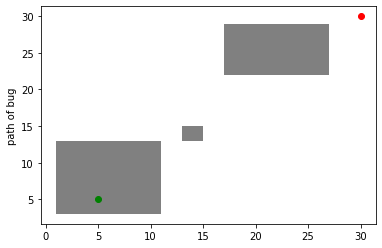

In [2]:
# Create Enviornment
initialize_area(w=30, h=30, bx=30, by=30, gx=5, gy=5)
get_trajectory()
create_obstacle(1, 3, 10, 10)
create_obstacle(13, 13, 2, 2)
create_obstacle(17, 22, 10, 7)
for e in obstacle_list:
    tmp = plt.Rectangle((e[0],e[1]), e[2], e[3], fc='gray')
    plt.gca().add_patch(tmp)
plt.plot(bug_x, bug_y, 'ro')
plt.plot(goal_x, goal_y, 'go')
plt.ylabel('path of bug')
plt.show()


In [3]:
# Run Search
not_found = False
while((not not_found) and (bug_x != goal_x) or (bug_y != goal_y)):
    update_bug()
    uniques = list(set([tuple(x) for x in bug_path_history]))
    if(len(uniques) != len(bug_path_history)):
        not_found = True
        break
if(not_found):
    print("_No Path To Target!")
else:
    print("_Search Done!")

_No Path To Target!


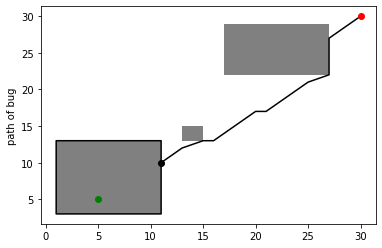

In [4]:
la = [x for x,y in bug_path_history]
lb = [y for x,y in bug_path_history]
for e in obstacle_list:
    tmp = plt.Rectangle((e[0],e[1]), e[2], e[3], fc='gray')
    plt.gca().add_patch(tmp)
plt.plot(la,lb, 'k')
plt.plot(bug_x_start, bug_y_start, 'ro')
plt.plot(goal_x, goal_y, 'go')
plt.plot(bug_x, bug_y, 'ko')
plt.ylabel('path of bug')
plt.show()

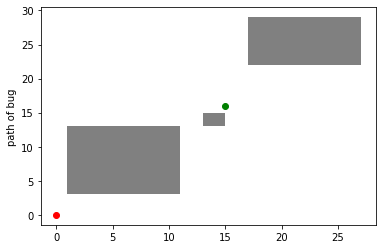

In [5]:
obstacle_list = []
trajectory_list = []
bug_path_history = []
# Create Enviornment
initialize_area(w=30, h=30, bx=0, by=0, gx=15, gy=16)
get_trajectory()
create_obstacle(1, 3, 10, 10)
create_obstacle(13, 13, 2, 2)
create_obstacle(17, 22, 10, 7)
for e in obstacle_list:
    tmp = plt.Rectangle((e[0],e[1]), e[2], e[3], fc='gray')
    plt.gca().add_patch(tmp)
plt.plot(bug_x, bug_y, 'ro')
plt.plot(goal_x, goal_y, 'go')
plt.ylabel('path of bug')
plt.show()


In [6]:
# Run Search
not_found = False
while((not not_found) and (bug_x != goal_x) or (bug_y != goal_y)):
    update_bug()
    uniques = list(set([tuple(x) for x in bug_path_history]))
    if(len(uniques) != len(bug_path_history)):
        not_found = True
        break
if(not_found):
    print("_No Path To Target!")
else:
    print("_Search Done!")

_Search Done!


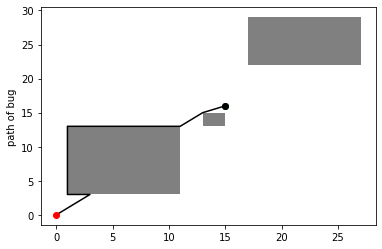

In [7]:
la = [x for x,y in bug_path_history]
lb = [y for x,y in bug_path_history]
for e in obstacle_list:
    tmp = plt.Rectangle((e[0],e[1]), e[2], e[3], fc='gray')
    plt.gca().add_patch(tmp)
plt.plot(la,lb, 'k')
plt.plot(bug_x_start, bug_y_start, 'ro')
plt.plot(goal_x, goal_y, 'go')
plt.plot(bug_x, bug_y, 'ko')
plt.ylabel('path of bug')
plt.show()